In [1]:
import numpy as np
import os
import glob

from random import *
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
# %matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
from keras.layers.convolutional import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

2023-07-15 17:13:32.289540: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 17:13:32.391237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 17:13:32.391866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 17:13:33.081338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#These are the forms in the dataset for quick access from manipulation of the file names on each column. Let's create a dictionary with form and writer mapping.
d = {}
from subprocess import check_output
with open('/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/FormsIAMSmall.txt') as f:
    for line in f:
        key = line.split(' ')[0]
        writer = line.split(' ')[1]
        print(key , " :: ", writer)
        d[key] = writer
print(len(d.keys()))

a01-000u  ::  000
a01-000x  ::  001
a01-003  ::  002
a01-003u  ::  000
a01-003x  ::  003
a01-007  ::  004
a01-007u  ::  000
a01-007x  ::  003
a01-011  ::  005
a01-011u  ::  000
a01-011x  ::  006
a01-014  ::  007
a01-014u  ::  000
a01-014x  ::  008
a01-020  ::  009
a01-020u  ::  000
a01-020x  ::  010
a01-026  ::  009
a01-026u  ::  000
a01-026x  ::  008
a01-030  ::  005
a01-030u  ::  000
a01-030x  ::  010
a01-038  ::  007
a01-038x  ::  011
a01-043  ::  012
a01-043u  ::  000
a01-043x  ::  011
a01-049  ::  012
a01-049u  ::  000
a01-049x  ::  000
a01-053  ::  013
a01-053u  ::  000
a01-053x  ::  014
a01-058  ::  013
a01-058u  ::  000
a01-058x  ::  014
a01-063  ::  013
a01-063u  ::  000
a01-063x  ::  015
a01-068u  ::  000
a01-072u  ::  000
a01-072x  ::  001
a01-077  ::  016
a01-077u  ::  000
a01-082u  ::  000
a01-087  ::  017
a01-087u  ::  000
a01-091  ::  016
a01-091u  ::  000
a01-096u  ::  000
a01-102  ::  016
a01-102u  ::  000
a01-107  ::  018
a01-107u  ::  000
a01-113  ::  018
a01-113u  :

In [3]:
# All file-names list and target-writer names list are created.
tmp = []
target_list = []
tempDict = {}
tempDict = d.copy()
print(tempDict)
path_to_files = os.path.join('/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/DataIAMFormSmall', '*')
for filename in sorted(glob.glob(path_to_files)):
#     print(filename)
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    #print(image_name)
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    form = parts[0] + '-' + parts[1]
    #print("Form Image :: ", form)
    tempDict = d.copy()
    for key in d.keys():
        print("Keys:: ",key , "  :: Form : ", form)
        if key == form:
            val = tempDict.get(key)
            if val:
               #print("Form mapped with key :: ", key, " :: ", str(val))
               target_list.append(str(val))
               del tempDict[key]
    #print(target_list)

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)
#print(img_targets)
#print(img_files)
print(img_files.shape)
print(img_targets.shape)

{'a01-000u': '000', 'a01-000x': '001', 'a01-003': '002', 'a01-003u': '000', 'a01-003x': '003', 'a01-007': '004', 'a01-007u': '000', 'a01-007x': '003', 'a01-011': '005', 'a01-011u': '000', 'a01-011x': '006', 'a01-014': '007', 'a01-014u': '000', 'a01-014x': '008', 'a01-020': '009', 'a01-020u': '000', 'a01-020x': '010', 'a01-026': '009', 'a01-026u': '000', 'a01-026x': '008', 'a01-030': '005', 'a01-030u': '000', 'a01-030x': '010', 'a01-038': '007', 'a01-038x': '011', 'a01-043': '012', 'a01-043u': '000', 'a01-043x': '011', 'a01-049': '012', 'a01-049u': '000', 'a01-049x': '000', 'a01-053': '013', 'a01-053u': '000', 'a01-053x': '014', 'a01-058': '013', 'a01-058u': '000', 'a01-058x': '014', 'a01-063': '013', 'a01-063u': '000', 'a01-063x': '015', 'a01-068u': '000', 'a01-072u': '000', 'a01-072x': '001', 'a01-077': '016', 'a01-077u': '000', 'a01-082u': '000', 'a01-087': '017', 'a01-087u': '000', 'a01-091': '016', 'a01-091u': '000', 'a01-096u': '000', 'a01-102': '016', 'a01-102u': '000', 'a01-107'

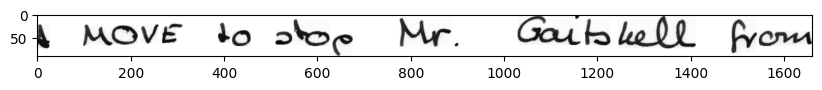

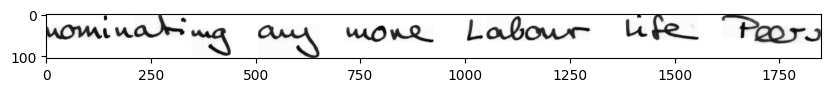

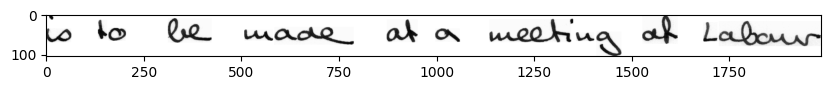

In [4]:
# visualize the image data
for filename in img_files[:3]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

In [5]:
# normalisation is done using label encoder. No, categorical data.
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[:10], img_targets[:10], encoded_Y[:10])

['/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-00.png'
 '/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-01.png'
 '/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-02.png'
 '/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s00-03.png'
 '/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_HandWrittenTextExtraction/DataIAMFormSmall/a01-000u-s01-00.png'
 '/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/RIO_Ha

In [6]:
# Splitting of data into training and validation sets for cross validation with 4:1:1 ratio.
train_files, rem_files, train_targets, rem_targets = train_test_split(
        img_files, encoded_Y, train_size=0.66, random_state=52, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

(233,) (60,) (61,)
(233,) (60,) (61,)


In [7]:
# Generator function for generating random crops from each sentence randomly cropping 113*113 patches from images

batch_size = 8
num_classes = 7

def generate_data(samples, target_files,  batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_targets = target_files[offset:offset+batch_size]

            images = []
            targets = []
            for i in range(len(batch_samples)):
                batch_sample = batch_samples[i]
                batch_target = batch_targets[i]
                im = Image.open(batch_sample)
                cur_width = im.size[0]
                cur_height = im.size[1]

                # print(cur_width, cur_height)
                height_fac = 113 / cur_height

                new_width = int(cur_width * height_fac)
                size = new_width, 113

                imresize = im.resize((size), Image.ANTIALIAS)  # Resize so height = 113 while keeping aspect ratio
                now_width = imresize.size[0]
                now_height = imresize.size[1]
                # Generate crops of size 113x113 from this resized image and keep random 10% of crops

                avail_x_points = list(range(0, now_width - 113 ))# total x start points are from 0 to width -113

                # Pick random x%
                pick_num = int(len(avail_x_points)*factor)

                # Now pick
                random_startx = sample(avail_x_points,  pick_num)

                for start in random_startx:
                    imcrop = imresize.crop((start, 0, start+113, 113))
                    images.append(np.asarray(imcrop))
                    targets.append(batch_target)

            
            X_train = np.array(images)
            y_train = np.array(targets)

            #reshape X_train for feeding in later
            X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)
            #convert to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            #One hot encode y
            y_train = to_categorical(y_train, num_classes)
            yield shuffle(X_train, y_train)

In [8]:
# For training and testing, generator function is called with the intent of making train and test generator data.
train_generator = generate_data(train_files, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)

In [9]:
# A Keras Model is built. Summary of the model is printed below.
def resize_image(image):
    import tensorflow as tf
    return tf.image.resize(image,[56,56])

In [10]:
# Function to resize image to 64x64
row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))

# Resise data within the neural network
model.add(Lambda(resize_image))  #resize images to allow for easy computation
#model.add(Lambda(lambda x: resize_image))

# CNN model - Building the model suggested in paper

model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1')) #96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters=128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, name='dense1'))  #1024
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64, name='dense2'))  #1024
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))  #softmax since output is within 50 classes
print("Worked till here")

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

print(model.summary())

Worked till here
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 115, 115, 1)      0         
 2D)                                                             
                                                                 
 lambda (Lambda)             (None, 56, 56, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                       

In [11]:
nb_epoch = 2
samples_per_epoch = 233
nb_val_samples = 62
from keras.callbacks import ModelCheckpoint
filepath="/home/ihsan/Documents/GitHub/ML-AI-ICT-course/Tcsion-Automate Extraction of handwritten text from an image/check-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]

#Model fit generator
history_object = model.fit(train_generator, steps_per_epoch= samples_per_epoch,
                                     validation_data=validation_generator,
                                     validation_steps=nb_val_samples, epochs=nb_epoch, verbose=1, callbacks=callbacks_list)
# history_object = model.fit(train_generator, 
#                                      steps_per_epoch=samples_per_epoch,
#                                       validation_data=validation_generator,
#                                       validation_steps=nb_val_samples, 
#                                      epochs=nb_epoch, verbose=1,
#                                      callbacks=callbacks_list)

Epoch 1/2


2023-07-15 17:13:36.069875: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188470440 exceeds 10% of free system memory.
2023-07-15 17:13:36.240155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-15 17:13:37.016280: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188470440 exceeds 10% of free system memory.
2023-07-15 17:13:37.133685: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 195201000 exceeds 10% of free system memory.
2023-07-15 17:13:37.182281: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 46287360 exceeds 10% of free system memory.
2023-07-15 17:13:37.225905: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 370298880 exceeds 10

 19/233 [=>............................] - ETA: 9:59 - loss: 0.2497 - accuracy: 0.9341 

: 

: 

In [4]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [9]:
import textblob
String1 = textblob("Mindmajix")
String1[1:4]     ### extracting 1 to 4 letters)

TypeError: 'module' object is not callable